# Econ 581
# Bill Polley
# Notes on Mathematical Economics

## Uncertainty, Risk, and Insurance
Much of what we have discussed over the past few weeks has been related to dynamic models of consumption smoothing.  This reflects the well-known observation (dating back to Milton Friedman and Franco Modigliani) that people prefer a smooth consumption profile.  We don't like a lot of variability.  Our models have featured a utility function that is concave and additively separable over time.  This delivers the consumption smoothing result that fits our observations.

A similar mechanism is at work with regard to risk.  As with time, people prefer to have smooth consumption profiles over different states of the world.  This is why we buy insurance.  Suppose there are two states of the world:  one in which I have a car accident, and one in which I do not.  Without insurance, my consumption of food and other things I like will be much lower in the accident state because I will need use some of my resources to repair or replace my car.  This is undesirable.  I would like to smooth my consumption across these states.  Insurance allows me to do that.  When I buy insurance, I pay a premium which reduces my consumption in every period (including those where I do not have an accident), but in return, I am compensated in the event that I do have an accident.  The economic intuition for consumption smoothing is the same, and the structure of the utility function is also very similar--concave and additively separable across different states.

Because of uncertainty, it is useful to have a concept of expected utility. That is, utility is a function of a random variable, and expected utility is the expected value of that function. This puts some additional restrictions on the utility function.

Remember that in the theory of consumer choice, the building blocks of utility are preferences. Briefly, a preference relation is a representation of the binary comparisons of the possible bundles of goods (choice set) that is complete and transitive. (See any good microeconomics text for elaboration.) An ordinal utility function assigns value to these bundles, so that for all $x$ and $y$ in the choice set, $U(x)\geq U(y)$ if and only if x is weakly preferred to y. "Ordinal" means it is the ordering of the bundles that is critical rather than the numerical value of the function. Therefore, ordinal utility functions are unique up to a monotonic transformation. In a world of certainty, you could scale the utility function by a monotonic transformation and it would not alter the results.

Example: Consider a utility function, $U(x,y)=x^\alpha y^\beta$. The log function is a monotonic transformation (i.e. it preserves order). Therefore, the function $\alpha \log x+\beta \log y$ represents the same preference relation. You can see this by deriving the demand functions for $x$ and $y$ for these two utility functions. They are the same. (Try it!)

Once we introduce uncertainty into the model, however, we require a stronger assumption on the utility function. A complete treatment of this is a bit beyond the scope of this course. You may have seen some of this in your graduate microeconomics course. Although a truly complete and thorough treatment is usually reserved for a Ph.D. level course. What follows is a very brief version. Refer to a graduate level microeconomics text for more elaboration. Mas-Colell, Whinston, and Green (1995) is one of the most comprehensive treatments out there, but many other texts address this point.

In a world of uncertainty, we can think of consumers having preferences over "lotteries." A lottery is a weighted average of utilities. For example, if there is a 10% chance of suffering a loss of consumption, $L$, as a result of hail damaging your car, and a 90% chance of not suffering a loss, we can represent this as an expected utility function $U(x)=0.1U(c-L)+0.9U(c)$. Here, $x$ is the lottery itself. If you own a car (and are not insured against hail damage), there is a probability that you will suffer a loss and a probability that you do not suffer the loss. Choosing to own a car without insurance means that you are taking this lottery.

Suppose that insurance is available for the cost of a premium $p$. You could then choose a different lottery, call it $y$, in which you receive a benefit $B$ if you suffer a loss. The utility from this lottery can be expressed as $U(y)=0.1U(c-p+B-L)+0.9U(c-p)$. Notice that in the state in which you suffer the loss, you receive $B$ to compensate you. You pay the insurance premium $p$ in both states. Depending on the values of $L,p,$ and $B$, the value of $U(y)$ may be greater than, less than, or equal to $U(x)$. Such a utility function is said to have the expected utility property as the utility of the lottery is the expected value of the utility in the different states of the world. These are also called Von Neumann-Morganstern (VNM) utility functions.

VNM utility functions are more restrictive than ordinal utility functions. They are cardinal utility functions. The numerical value matters, not just the ordering. Therefore, they are not unique up to a monotonic transformation. Instead, VNM utility functions are only unique up to an affine transformation (combination of a linear transformation and a translation). You can show, for example, that the log function, while a monotonic transformation, is not an affine transformation.

In other words, the curvature of the utility function matters when dealing with uncertainty. Affine transformations preserve curvature. As we will see, the degree of curvature influences the level of risk aversion. In the insurance example above, the more curvature in the utility function, the more that the person might be willing to pay for a given amount of insurance because they are more averse to risk.

Although we have not discussed risk specifically up to this point, we have already seen the effect of curvature in the dynamic models of consumption smoothing. We even used some of the language of risk aversion when describing the utility functions (e.g. CRRA: constant relative risk aversion). In the cake eating problem, the parameter $\gamma$ represented the curvature of the utility function which influenced the degree to which the consumer would substitute consumption between points in time. It's the same idea. In fact, in dynamic macro models with uncertainty in which the utility function only has a single parameter dictating its curvature with regard to both time and state of the world, problems can arise because that parameter is trying to capture both effects (which are different in reality). For elaboration on this point, see Mehra and Prescott's 1985 paper in the *Journal of Monetary Economics* and Kocherlakota's 1996 paper in the *Journal of Economic Literature*.

We will now take a closer look at an insurance problem similar to the one above. First import the usual packages and define our econplot function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

def econplot(x,series,x_min,x_max,y_min,y_max,chart_title,chart_x,chart_y):
    fig = plt.figure()
    fig.set_figheight(6)
    fig.set_figwidth(6)
    ax = fig.add_axes([0,0,1,1])
    ax.axis([x_min,x_max,y_min,y_max])
    if np.ndim(series)==1:
        ax.plot(x,series)
    else:
        for y in series:
            ax.plot(x,y)
    ax.set_xlabel(chart_x,size=16)     
    ax.set_ylabel(chart_y,size=16)    
    ax.set_title(chart_title,size=24)
    ax.tick_params(which='both',labelsize=16)
    return fig,ax

Now let us discuss risk aversion. Suppose that a consumer faces an uncertain income. They will either receive 10 units of consumption or 20 units of consumption. The probability of each outcome is 0.5. If the utility function is log, then the expected utility would be:

In [2]:
.5*np.log(10)+.5*np.log(20)

2.6491586832740186

This is the expected value of *utility*.  Notice, however, that the expected value of consumption is 15, and the utility from that level of consumption is:

In [3]:
np.log(15)

2.70805020110221

The utility from receiving 15 units with certainty is higher than the expected utility of receiving either 10 or 20 units with equal probability. In other words, this consumer would prefer to have 15 units with certainty over the gamble that yields either 10 or 20. The risk associated with the gamble is something that reduces utility and should be avoided. This we would call this consumer risk averse.

Risk aversion is a consequence of the concavity of the utility function. To see this, let's graph the log function from 10 to 20 and look at the end points.

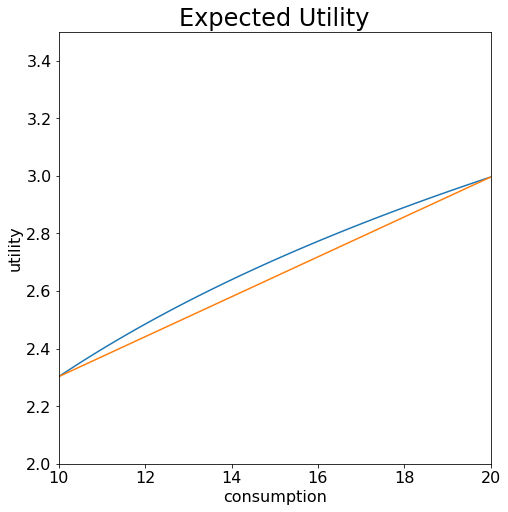

In [6]:
x=np.linspace(10,20,101)
y=np.array([np.log(x),2.30259+.0693147*(x - 10)])
fig,ax=econplot(x,y,10,20,2,3.5,'Expected Utility','consumption','utility')
plt.show()

As you can see, we have plotted a line connecting the points where consumption = 10 and consumption = 20. The straight line connecting those points shows us the expected utility. In fact, every point along that line would represent the expected utility for a particular set of probabilities. If the probabilities are 1/2 for each state, then the expected utility would be at the midpoint of the line (15, in this case). If the probablilities were .75 for 10 units and .25 for 20 units, we would be at the point on the line where consumption = 12.5. Note that the line is below the curve. This will always be the case for concave utility functions.

As you can probably guess, if a utility function was convex, it would imply that the utility from the gamble would be greater than the certainty equivalent.  Such a consumer would be risk loving.

If the utility function is linear, then the line connecting any two points would coincide with the utility function itself. This consumer is said to be risk neutral.

We typically assume that consumers are risk averse. However, when we are dealing with firms and the uncertainty over profits, we typically assume that firms are risk neutral.

### Optimal Insurance

Consider the case in the previous example. We might think of this as a consumer who would have an income of 20 in one state, but suffers a loss of 10 units in the other state. Would they optimally buy insurance against this loss?

Suppose that the insurance company is risk neutral. They will sell an insurance policy that will pay 10 units in the bad state. They will collect a premium of $K$ units in either state. What value of $K$ will the insurance company charge as its premium? It is not hard to show that in a competitive (i.e. zero profit) insurance market, a risk neutral firm will charge the expected value of what they pay out in the event of a loss. In our example this would be $\frac{1}{2}10+\frac{1}{2}0=5$.

Now the consumer has the choice between two possibilities.  With insurance, they would consume $20-5$ in the good state and $10-5+10$ in the bad state.  Without insurance, they would consume as shown above.  As you can see, in this case, insurance is the same as the certainty equivalent answer, which is definitely better.  In fact, it will always be the case that when a risk averse consumer is given the choice of actuarially fair insurance (risk neutral, zero profit insurer), they will choose to fully insure.

We can prove this formally. Let $\theta$ be the probability of a loss, $B$ be the amount of insurance purchased, $L$ be the amount of loss that we are insuring against, and $c$ be the base level of consumption. Note that a competitive, risk neutral insurer will charge a premium equal to the expected payout, which is $\theta B$.

$$\max_{B} \theta U(c-\theta B-L+B)+(1-\theta)U(c-\theta B)$$

First order condition:

$$\theta U'(c+(1-\theta)B-L)(1-\theta)-\theta (1-\theta)U'(c-\theta B)=0$$

$$U'(c+(1-\theta)B-L)=U'(c-\theta B)$$

$$B=L$$

Therefore, the consumer chooses an insurance benefit equal to the amount of loss they would suffer (full insurance).

Note that a risk loving individual would not buy insurance at all. Buying any amount of insurance makes them worse off. (Draw a diagram to prove this to yourself.) If is was possible for the risk loving individual to sell insurance, they would. Assuming some kind of solvency constraint (preventing them from selling so much insurance that they go bankrupt in the bad state), they would push themselves to that boundary.

There are many extensions to this model that are possible to discuss situations in insurance as well as finance. The mathematics of derivative instruments in finance bear a strong resemblance to insurance models. The idea is similar--reducing exposure to risk and smoothing consumption across different states of the world.

### In Class Exercise

Suppose that you have a consumer who earns income of $y$ units of consumption but faces a probability $0 < \theta < 1$ that they will suffer a loss of $L$ units of consumption. Utility is logarithmic, and the expected utility function is additively separable across states (as in class). There will also be an insurance premium an amount of coverage purchased, $B$.

a)  Write a function for the expected utility as a function of $y,\theta,B,L,$ and the insurance premium.

b)  Suppose there is a risk neutral insurer, but unlike our example, this insurer must cover costs equal to $x\%$ of their collected premiums. They pass this cost on to the consumer as a surcharge on the premium. So for every dollar of coverage the customer buys, the insurer charges $(1+x)\theta$ in premiums.

c)  Write a function that solves for the optimal amount of insurance purchased ($B$) by the consumer given the parameters. (It might be easier to derive the FOC by hand and then write the Python function to solve the FOC.)

d)  Would the consumer optimally fully insure?  For a given set of parameters, compute the optimal insurance coverage as well as the expected utility for the following cases: 1) no insurance, 2) optimal insurance, 3) full insurance.